In [1]:
from data_preparation.functions import download, transform
import pandas as pd

URL = "https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_aperturas.xls"
PATH = "index.csv"
SHEET_NAME = "Índices aperturas"
REGIONS = {"GBA": (5, 46),
           "Pampeana": (56, 44),
           "Noroeste": (105, 44),
           "Noreste": (154, 44),
           "Cuyo": (203,44),
           "Patagonia": (252,44)}
PATH_DATA_TRANSFORMED = "index_transformed.csv"

download(URL, SHEET_NAME, PATH)
data = transform(PATH, REGIONS, PATH_DATA_TRANSFORMED)

Primero poder ver los primeros y los últimos registros del dataframe para tener una idea de como está compuesto:

In [2]:
data

,category,date,value,region
0,Nivel general,2016-12-01,100.0000,GBA
1,Alimentos y bebidas no alcohólicas,2016-12-01,100.0000,GBA
2,Alimentos,2016-12-01,100.0000,GBA
3,Pan y cereales,2016-12-01,100.0000,GBA
4,Carnes y derivados,2016-12-01,100.0000,GBA
...,...,...,...,...
3306,Educación,2023-04-01,1051.1584,Patagonia
3307,Restaurantes y hoteles,2023-04-01,1512.6841,Patagonia
3308,Restaurantes y comidas fuera del hogar,2023-04-01,1511.5366,Patagonia
3309,Bienes y servicios varios,2023-04-01,1253.3177,Patagonia


Para poder hacer algunas de las operaciones que vamos a hacer es mejor tener ordenado el dataframe.

In [3]:
data = data.sort_values(["region", "category", "date"],ignore_index=True)
data

,category,date,value,region
0,"Aceites, grasas y manteca",2016-12-01,100.0000,Cuyo
1,"Aceites, grasas y manteca",2017-01-01,104.4466,Cuyo
2,"Aceites, grasas y manteca",2017-02-01,112.0237,Cuyo
3,"Aceites, grasas y manteca",2017-03-01,111.1990,Cuyo
4,"Aceites, grasas y manteca",2017-04-01,110.9950,Cuyo
...,...,...,...,...
20015,"Vivienda, agua, electricidad, gas y otros comb...",2022-12-01,893.0340,Patagonia
20016,"Vivienda, agua, electricidad, gas y otros comb...",2023-01-01,965.7310,Patagonia
20017,"Vivienda, agua, electricidad, gas y otros comb...",2023-02-01,1002.5857,Patagonia
20018,"Vivienda, agua, electricidad, gas y otros comb...",2023-03-01,1045.6743,Patagonia


Es importante que no haya ningún valor duplicado, es decir que ninguna columna comparta los valores de "region", "date" y "category" al mismo tiempo.

In [4]:
data[data[["region", "date", "category"]].duplicated() == True]

,category,date,value,region


Con el método info() podemos ver si hay valores nulos en alguna de las columnas y de qué tipo es cada una.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20020 entries, 0 to 20019
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   category  20020 non-null  object        
 1   date      20020 non-null  datetime64[ns]
 2   value     19984 non-null  float64       
 3   region    20020 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 625.8+ KB


Solo la columna value tiene valores nulos. Vamos a tener que decidir que acción tomamos: eliminarlos, reemplazarlos o dejarlos como están. Con el método describe() se pueden observar que rango de valores toman las columnas numéricas. Para la columna "date" es importante que vaya desde diciembre de 2016 a abril de 2023. Para el caso de "value" no tiene que haber valores negativos.

In [6]:
data.describe()

,date,value
count,20020,19984.000000
mean,2020-01-31 03:07:00.779220736,404.744753
min,2016-12-01 00:00:00,95.350100
25%,2018-07-01 00:00:00,148.483250
50%,2020-02-01 00:00:00,292.818150
75%,2021-09-01 00:00:00,518.711550
max,2023-04-01 00:00:00,2429.889100
std,NaN,344.643996


Vamos a observar para que categoría, fecha y región hay valores nulos de "value".

In [7]:
data[data["value"].isna()]

,category,date,value,region
1118,Calzado,2020-04-01,NaN,Cuyo
2350,Prendas de vestir y materiales,2020-04-01,NaN,Cuyo
2581,Restaurantes y comidas fuera del hogar,2020-04-01,NaN,Cuyo
2582,Restaurantes y comidas fuera del hogar,2020-05-01,NaN,Cuyo
2583,Restaurantes y comidas fuera del hogar,2020-06-01,NaN,Cuyo
2584,Restaurantes y comidas fuera del hogar,2020-07-01,NaN,Cuyo
4429,Calzado,2020-04-01,NaN,GBA
5815,Prendas de vestir y materiales,2020-04-01,NaN,GBA
6046,Restaurantes y comidas fuera del hogar,2020-04-01,NaN,GBA
6047,Restaurantes y comidas fuera del hogar,2020-05-01,NaN,GBA


Por las fechas parece que tiene que ver con la cuarentena, quizás valores que no se relevaron. Lo ideal para tomar una decisión de que hacer es saber qué uso va a tener el dataset. En este caso, se va a suponer que se requieren estos valores y se van a reemplazar los nulos mediante una interpolación.

In [8]:
data_filled = data.copy()

In [9]:
data_grouped = data.groupby(["region", "category"])
data_filled["value"] = data_grouped["value"].apply(lambda x: x.interpolate()).reset_index()["value"]

Vamos a comprobar que los únicos valores cambiados fueron los nullos.

In [10]:
pd.concat([data, data_filled]).drop_duplicates(keep=False)["date"].value_counts()

date
2020-04-01    36
2020-05-01    12
2020-06-01    12
2020-07-01    12
Name: count, dtype: int64

In [11]:
data_filled[data_filled["value"].isna()]

,category,date,value,region


In [12]:
data = data_filled.copy()

Ahora vamos a comprobar que todos las fechas tengan la misma cantidad de datos.

<Axes: ylabel='Frequency'>

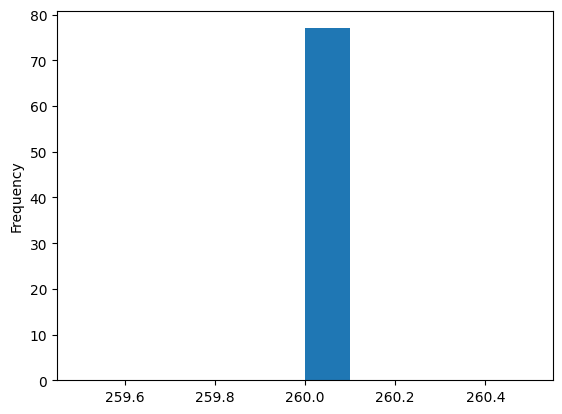

In [13]:
data["date"].value_counts().plot(kind="hist")

También si todas las categorías tienen la misma cantidad de datos.

In [14]:
data["category"].value_counts()

category
Aceites, grasas y manteca                                                   462
Adquisición de vehículos                                                    462
Gastos de prepagas                                                          462
Leche, productos lácteos y huevos                                           462
Nivel general                                                               462
Pan y cereales                                                              462
Periódicos, diarios, revistas, libros y artículos de papelería              462
Prendas de vestir y calzado                                                 462
Prendas de vestir y materiales                                              462
Productos medicinales, artefactos y equipos para la salud                   462
Recreación y cultura                                                        462
Restaurantes y comidas fuera del hogar                                      462
Restaurantes y hoteles         

Vemos que hay dos categorías que tienen menos datos. Vamos a ver a que región pertenecen.

In [15]:
data[data["category"].isin(["Equipos audiovisuales, fotográficos y de procesamiento de la información", "Mantenimiento y reparación de la vivienda"])]["region"].value_counts()

region
GBA    154
Name: count, dtype: int64

Podemos ver que hay dos categorías que solo aparecen para GBA. Por esto esta región va a tener más registros.

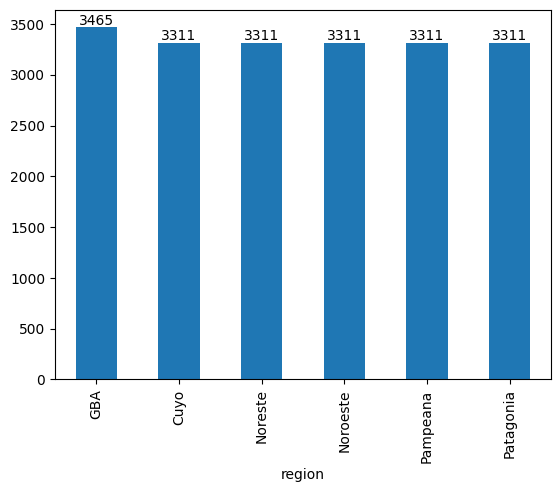

In [16]:
ax = data["region"].value_counts().plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)

Ahora vamos a analizar los valores de "value". Lo importante es que no tenga valores negativos y que el cambio entre valores sea razonable. Con un histograma se puede ver qué valores son los más típicos.

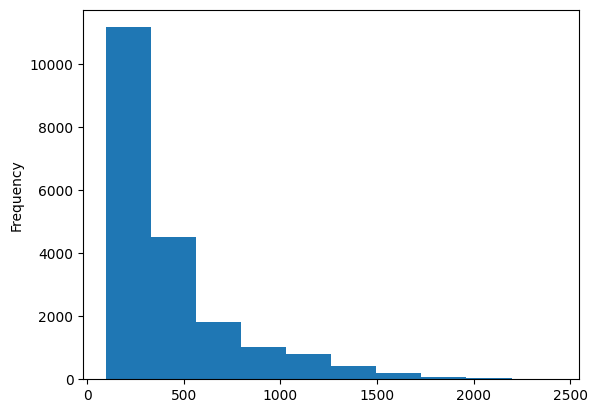

In [18]:
ax = data["value"].plot(kind="hist")
# for container in ax.containers:
    # ax.bar_label(container)

Para ver el cambio de valores se puede usar el método pct_change() agrupando por región y categoría.

In [19]:
df = data.sort_values(['region', 'category', 'date'])
grouped = df.groupby(['region', 'category'])
df['percentage_change'] = grouped['value'].pct_change()
df


,category,date,value,region,percentage_change
0,"Aceites, grasas y manteca",2016-12-01,100.0000,Cuyo,NaN
1,"Aceites, grasas y manteca",2017-01-01,104.4466,Cuyo,0.044466
2,"Aceites, grasas y manteca",2017-02-01,112.0237,Cuyo,0.072545
3,"Aceites, grasas y manteca",2017-03-01,111.1990,Cuyo,-0.007362
4,"Aceites, grasas y manteca",2017-04-01,110.9950,Cuyo,-0.001835
...,...,...,...,...,...
20015,"Vivienda, agua, electricidad, gas y otros comb...",2022-12-01,893.0340,Patagonia,0.042578
20016,"Vivienda, agua, electricidad, gas y otros comb...",2023-01-01,965.7310,Patagonia,0.081405
20017,"Vivienda, agua, electricidad, gas y otros comb...",2023-02-01,1002.5857,Patagonia,0.038162
20018,"Vivienda, agua, electricidad, gas y otros comb...",2023-03-01,1045.6743,Patagonia,0.042977


In [20]:
df["percentage_change"].describe()

count    19760.000000
mean         0.035911
std          0.031571
min         -0.166368
25%          0.015954
50%          0.030483
75%          0.050689
max          0.516290
Name: percentage_change, dtype: float64

Se puede ver que los valores son razonables. El cambio más grande es de un 50%.

Observaciones:

1. Hay valores faltantes para las categorías "Prendas de vestir y materiales", "Calzado" y "Restaurantes y comidas fuera del hogar" durante algunos meses del 2020. Probablemente tenga relación con la cuarentena.
2. No hay valores negativos en los índices y no hay ningún cambio mes a mes que parezca fuera de lo normal.
3. Hay dos categorías "Equipos audiovisuales, fotográficos y de procesamiento de la información" y "Mantenimiento y reparación de la vivienda" que sólo aparecen para GBA.
4. 
5.